In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, make_scorer
from catboost import CatBoostClassifier, Pool


import pickle

In [3]:
epl23 = pd.read_csv(r'C:\Users\Ayodele\Desktop\epl\E0.csv')
epl23.head(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/2023,20:00,Burnley,Man City,0,3,A,0,2,...,2.28,1.50,1.95,1.98,1.95,1.97,NaN,NaN,1.92,1.95
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,2.63,-2.00,1.95,1.98,1.93,1.97,2.01,2.09,1.95,1.92
2,E0,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,2.12,0.00,2.02,1.91,2.01,1.92,2.06,1.96,1.96,1.91
3,E0,12/08/2023,15:00,Brighton,Luton,4,1,H,1,0,...,2.48,-1.75,2.01,1.92,2.00,1.91,2.14,1.93,2.00,1.86
4,E0,12/08/2023,15:00,Everton,Fulham,0,1,A,0,0,...,1.71,-0.25,2.06,1.87,2.04,1.88,2.08,1.99,1.98,1.88
5,E0,12/08/2023,15:00,Sheffield United,Crystal Palace,0,1,A,0,0,...,1.53,0.25,2.10,1.83,2.10,1.84,2.12,1.86,2.05,1.83
6,E0,12/08/2023,17:30,Newcastle,Aston Villa,5,1,H,2,1,...,2.22,-0.75,1.84,2.09,1.85,2.09,1.87,2.13,1.82,2.06
7,E0,13/08/2023,14:00,Brentford,Tottenham,2,2,D,2,2,...,2.15,0.00,1.88,2.02,1.89,2.03,1.95,2.05,1.89,1.98
8,E0,13/08/2023,16:30,Chelsea,Liverpool,1,1,D,1,1,...,2.52,0.25,1.98,1.92,2.00,1.93,2.03,2.08,1.91,1.96
9,E0,14/08/2023,20:00,Man United,Wolves,1,0,H,0,0,...,2.37,-1.50,1.80,2.00,1.82,2.08,1.88,2.14,1.82,2.05


In [4]:
epl23.shape

(380, 106)

In [5]:
epl22 = pd.read_csv(r'C:\Users\Ayodele\Desktop\epl\E0 (1).csv')
epl22.head(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,1.76,0.50,2.09,1.84,2.04,1.88,2.09,1.88,2.03,1.85
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,2.73,1.75,1.90,2.03,1.91,2.02,2.01,2.06,1.89,1.99
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,1.76,0.50,1.93,2.00,1.93,2.00,1.94,2.04,1.88,2.00
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,...,1.87,-0.25,2.08,1.85,2.10,1.84,2.14,1.87,2.08,1.81
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,0,0,...,1.89,-1.00,1.97,1.96,1.99,1.93,2.19,1.97,2.03,1.86
5,E0,06/08/2022,15:00,Tottenham,Southampton,4,1,H,2,1,...,2.31,-1.50,2.07,1.86,2.04,1.88,2.08,1.88,2.03,1.85
6,E0,06/08/2022,17:30,Everton,Chelsea,0,1,A,0,1,...,1.77,1.00,1.93,2.00,1.94,1.98,1.94,2.11,1.88,2.00
7,E0,07/08/2022,14:00,Leicester,Brentford,2,2,D,1,0,...,1.97,-0.50,1.94,1.99,1.96,1.96,1.96,2.04,1.92,1.96
8,E0,07/08/2022,14:00,Man United,Brighton,1,2,A,0,2,...,1.94,-0.75,2.06,1.87,2.05,1.88,2.08,1.97,2.00,1.88
9,E0,07/08/2022,16:30,West Ham,Man City,0,2,A,0,1,...,2.62,1.50,1.85,2.08,1.85,2.08,2.00,2.12,1.85,2.04


In [6]:
epl21 = pd.read_csv(r'C:\Users\Ayodele\Desktop\epl\E0 (2).csv')
epl21.head(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86
5,E0,14/08/2021,15:00,Leicester,Wolves,1,0,H,1,0,...,1.79,-0.75,2.02,1.91,2.01,1.92,2.05,1.95,1.99,1.89
6,E0,14/08/2021,15:00,Watford,Aston Villa,3,2,H,2,0,...,1.74,0.25,2.02,1.91,2.04,1.89,2.04,1.93,1.99,1.90
7,E0,14/08/2021,17:30,Norwich,Liverpool,0,3,A,0,1,...,2.48,1.25,1.85,2.08,1.85,2.09,2.03,2.10,1.88,2.01
8,E0,15/08/2021,14:00,Newcastle,West Ham,2,4,A,2,1,...,1.95,0.25,2.01,1.92,2.02,1.91,2.12,1.94,2.00,1.89
9,E0,15/08/2021,16:30,Tottenham,Man City,1,0,H,0,0,...,1.99,1.00,1.84,2.09,1.87,2.06,1.94,2.15,1.84,2.05


In [7]:
epl20 = pd.read_csv(r'C:\Users\Ayodele\Desktop\epl\E0 (3).csv')
epl20.head(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97
5,E0,13/09/2020,16:30,Tottenham,Everton,0,1,A,0,0,...,1.79,-0.50,2.09,1.81,2.09,1.85,2.16,1.86,2.08,1.81
6,E0,14/09/2020,20:15,Brighton,Chelsea,1,3,A,0,1,...,2.17,1.00,1.93,1.97,1.94,1.98,2.02,2.02,1.93,1.95
7,E0,14/09/2020,18:00,Sheffield United,Wolves,0,2,A,0,2,...,1.39,0.25,1.70,2.10,1.74,2.23,1.86,2.28,1.74,2.18
8,E0,19/09/2020,12:30,Everton,West Brom,5,2,H,2,1,...,1.85,-1.00,2.09,1.81,2.14,1.82,2.15,1.90,2.06,1.83
9,E0,19/09/2020,15:00,Leeds,Fulham,4,3,H,2,1,...,1.88,-0.75,1.97,1.93,1.99,1.94,2.01,2.03,1.95,1.93


In [8]:
epl19 = pd.read_csv(r'C:\Users\Ayodele\Desktop\epl\E0 (4).csv')
epl19.head(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93
5,E0,10/08/2019,15:00,Watford,Brighton,0,3,A,0,1,...,1.73,-0.50,2.04,1.86,2.05,1.88,2.12,1.91,2.05,1.84
6,E0,10/08/2019,17:30,Tottenham,Aston Villa,3,1,H,0,1,...,2.40,-1.50,2.10,1.70,2.18,1.77,2.21,1.87,2.08,1.80
7,E0,11/08/2019,14:00,Leicester,Wolves,0,0,D,0,0,...,1.62,-0.25,2.07,1.83,2.11,1.83,2.12,1.98,2.06,1.84
8,E0,11/08/2019,14:00,Newcastle,Arsenal,0,1,A,0,0,...,2.05,0.25,1.99,1.91,1.99,1.95,2.17,1.97,2.00,1.89
9,E0,11/08/2019,16:30,Man United,Chelsea,4,0,H,1,0,...,1.84,-0.50,2.02,1.88,2.04,1.90,2.10,1.91,2.04,1.85


In [9]:
epl1 = pd.concat([epl23, epl22, epl21, epl20, epl19], axis = 0)
epl1.reset_index(drop = True)
epl1.head(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/2023,20:00,Burnley,Man City,0,3,A,0,2,...,2.28,1.50,1.95,1.98,1.95,1.97,NaN,NaN,1.92,1.95
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,2.63,-2.00,1.95,1.98,1.93,1.97,2.01,2.09,1.95,1.92
2,E0,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,2.12,0.00,2.02,1.91,2.01,1.92,2.06,1.96,1.96,1.91
3,E0,12/08/2023,15:00,Brighton,Luton,4,1,H,1,0,...,2.48,-1.75,2.01,1.92,2.00,1.91,2.14,1.93,2.00,1.86
4,E0,12/08/2023,15:00,Everton,Fulham,0,1,A,0,0,...,1.71,-0.25,2.06,1.87,2.04,1.88,2.08,1.99,1.98,1.88
5,E0,12/08/2023,15:00,Sheffield United,Crystal Palace,0,1,A,0,0,...,1.53,0.25,2.10,1.83,2.10,1.84,2.12,1.86,2.05,1.83
6,E0,12/08/2023,17:30,Newcastle,Aston Villa,5,1,H,2,1,...,2.22,-0.75,1.84,2.09,1.85,2.09,1.87,2.13,1.82,2.06
7,E0,13/08/2023,14:00,Brentford,Tottenham,2,2,D,2,2,...,2.15,0.00,1.88,2.02,1.89,2.03,1.95,2.05,1.89,1.98
8,E0,13/08/2023,16:30,Chelsea,Liverpool,1,1,D,1,1,...,2.52,0.25,1.98,1.92,2.00,1.93,2.03,2.08,1.91,1.96
9,E0,14/08/2023,20:00,Man United,Wolves,1,0,H,0,0,...,2.37,-1.50,1.80,2.00,1.82,2.08,1.88,2.14,1.82,2.05


In [10]:
epl1.shape

(1900, 106)

In [11]:
epl1.isna().sum()

Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
           ..
PCAHA       0
MaxCAHH     1
MaxCAHA     1
AvgCAHH     0
AvgCAHA     0
Length: 106, dtype: int64

In [12]:
epl2 = epl1.dropna()
epl2.shape

(1699, 106)

In [13]:
epl2.dtypes

Div          object
Date         object
Time         object
HomeTeam     object
AwayTeam     object
             ...   
PCAHA       float64
MaxCAHH     float64
MaxCAHA     float64
AvgCAHH     float64
AvgCAHA     float64
Length: 106, dtype: object

In [14]:
epl2.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

In [15]:
epl2['Date'] = pd.to_datetime(epl2['Date'], dayfirst = True)
epl2['Date'] = epl2['Date'].dt.strftime('%Y')
epl2.head()

<ipython-input-15-f864177178c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epl2['Date'] = pd.to_datetime(epl2['Date'], dayfirst = True)
<ipython-input-15-f864177178c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epl2['Date'] = epl2['Date'].dt.strftime('%Y')


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
1,E0,2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,2.63,-2.00,1.95,1.98,1.93,1.97,2.01,2.09,1.95,1.92
2,E0,2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,2.12,0.00,2.02,1.91,2.01,1.92,2.06,1.96,1.96,1.91
3,E0,2023,15:00,Brighton,Luton,4,1,H,1,0,...,2.48,-1.75,2.01,1.92,2.00,1.91,2.14,1.93,2.00,1.86
4,E0,2023,15:00,Everton,Fulham,0,1,A,0,0,...,1.71,-0.25,2.06,1.87,2.04,1.88,2.08,1.99,1.98,1.88
5,E0,2023,15:00,Sheffield United,Crystal Palace,0,1,A,0,0,...,1.53,0.25,2.10,1.83,2.10,1.84,2.12,1.86,2.05,1.83


In [16]:
epl2['Date'].value_counts()

Date
2021    407
2023    399
2022    356
2020    336
2019    199
2024      2
Name: count, dtype: int64

In [17]:
epl3 = epl2.iloc[:, [1,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23]]
epl3.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
1,2023,Arsenal,Nott'm Forest,2,1,H,2,0,H,15,...,7,2,12,12,8,3,2,2,0,0
2,2023,Bournemouth,West Ham,1,1,D,0,0,D,14,...,5,3,9,14,10,4,1,4,0,0
3,2023,Brighton,Luton,4,1,H,1,0,H,27,...,12,3,11,12,6,7,2,2,0,0
4,2023,Everton,Fulham,0,1,A,0,0,D,19,...,9,2,12,6,10,4,0,2,0,0
5,2023,Sheffield United,Crystal Palace,0,1,A,0,0,D,8,...,1,8,18,11,5,5,3,0,0,0


In [18]:
epl3.dtypes

Date        object
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR         object
HTHG         int64
HTAG         int64
HTR         object
HS           int64
AS           int64
HST          int64
AST          int64
HF           int64
AF           int64
HC           int64
AC           int64
HY           int64
AY           int64
HR           int64
AR           int64
dtype: object

In [19]:
epl3.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR'],
      dtype='object')

In [20]:
epl3['FTR'].unique()

array(['H', 'D', 'A'], dtype=object)

In [21]:
epl3['FTR'].value_counts()

FTR
H    752
A    564
D    383
Name: count, dtype: int64

In [22]:
le = LabelEncoder()
epl3['FTR'] = le.fit_transform(epl3['FTR'])
epl3.head() #H =2 , D = 1, A = 0

<ipython-input-22-30750641d17d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epl3['FTR'] = le.fit_transform(epl3['FTR'])


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
1,2023,Arsenal,Nott'm Forest,2,1,2,2,0,H,15,...,7,2,12,12,8,3,2,2,0,0
2,2023,Bournemouth,West Ham,1,1,1,0,0,D,14,...,5,3,9,14,10,4,1,4,0,0
3,2023,Brighton,Luton,4,1,2,1,0,H,27,...,12,3,11,12,6,7,2,2,0,0
4,2023,Everton,Fulham,0,1,0,0,0,D,19,...,9,2,12,6,10,4,0,2,0,0
5,2023,Sheffield United,Crystal Palace,0,1,0,0,0,D,8,...,1,8,18,11,5,5,3,0,0,0


In [23]:
epl3c = epl3
epl3c.shape

(1699, 21)

In [24]:
epl4 = epl3c.drop(columns = ['HomeTeam', 'AwayTeam', 'Date', 'FTAG', 'FTHG', 'HTR', 'HTAG', 'HTHG' ], axis = 1)
epl4.head().reset_index(drop = True)

,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2,15,6,7,2,12,12,8,3,2,2,0,0
1,1,14,16,5,3,9,14,10,4,1,4,0,0
2,2,27,9,12,3,11,12,6,7,2,2,0,0
3,0,19,9,9,2,12,6,10,4,0,2,0,0
4,0,8,24,1,8,18,11,5,5,3,0,0,0


In [25]:
y = epl4['FTR']
x = epl4.copy()
x = x.drop('FTR', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, stratify = y_train, random_state = 42)

In [26]:
#ANALYZING WITH DECISION TREES
dt = DecisionTreeClassifier(random_state = 42).fit(x_train, y_train)

In [27]:
dt_pred = dt.predict(x_val)

In [28]:
print('accuracry score is: ', '%.4f' %accuracy_score(y_val, dt_pred))
print('precision score is: ', '%.4f' %precision_score(y_val, dt_pred, average = 'weighted'))
print('f1 score is: ', '%.4f' %f1_score(y_val, dt_pred, average = 'weighted'))
print('recall score is: ', '%.4f' %recall_score(y_val, dt_pred, average = 'weighted'))

accuracry score is:  1.0000
precision score is:  1.0000
f1 score is:  1.0000
recall score is:  1.0000


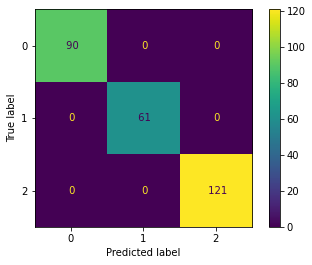

In [29]:
cm = confusion_matrix(y_val, dt_pred, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot(values_format = ' ')

[Text(0.5122422680412371, 0.9285714285714286, 'HST <= 5.5\ngini = 0.643\nsamples = 1359\nvalue = [451, 306, 602]\nclass = HOME'),
 Text(0.23969072164948454, 0.7857142857142857, 'AST <= 4.5\ngini = 0.65\nsamples = 880\nvalue = [384, 228, 268]\nclass = AWAY'),
 Text(0.10051546391752578, 0.6428571428571429, 'HST <= 1.5\ngini = 0.658\nsamples = 500\nvalue = [139, 158, 203]\nclass = HOME'),
 Text(0.05154639175257732, 0.5, 'HF <= 7.5\ngini = 0.519\nsamples = 50\nvalue = [31, 15, 4]\nclass = AWAY'),
 Text(0.020618556701030927, 0.35714285714285715, 'HST <= 0.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6, 0]\nclass = DRAW'),
 Text(0.010309278350515464, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = AWAY'),
 Text(0.030927835051546393, 0.21428571428571427, 'AS <= 7.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6, 0]\nclass = DRAW'),
 Text(0.020618556701030927, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.041237113402061855, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.082

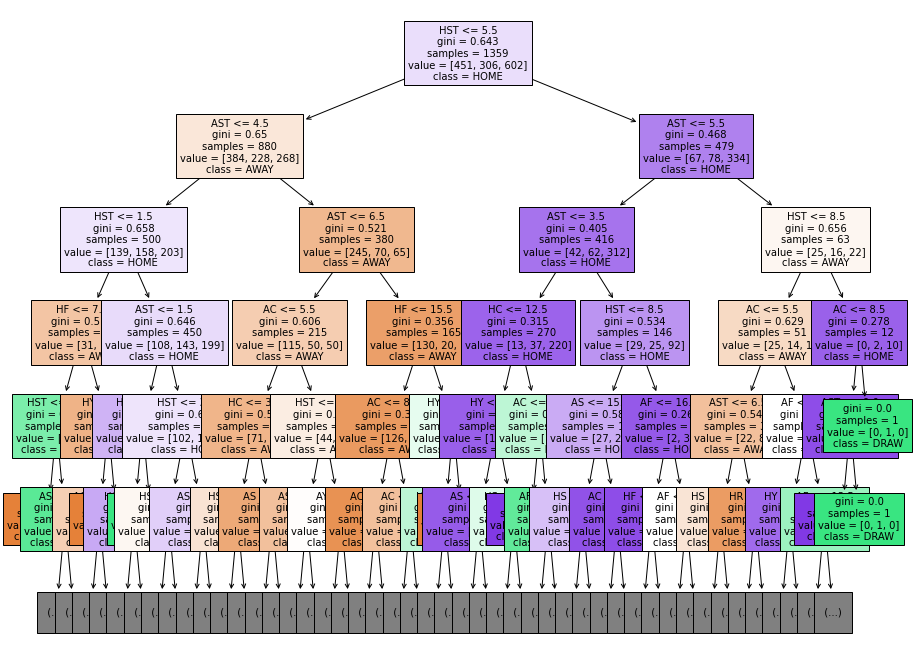

In [30]:
plt.figure(figsize = (15,12))
plot_tree(dt, max_depth = 5, fontsize = 10, feature_names = x.columns, class_names = {0:'AWAY', 1:'DRAW', 2: 'HOME'}, filled = True)

In [36]:
%%time
#HYPERPARAMETER TUNING
param = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
        'min_samples_leaf':[2,3,4,5,6,7,8,9, 10, 15, 20, 50]
        }

precision_scorer = make_scorer(precision_score, average='weighted', zero_division = 0)
recall_scorer = make_scorer(recall_score, average='weighted', zero_division = 0)
f1_scorer = make_scorer(f1_score, average='weighted', zero_division = 0)
accuracy_scorer = make_scorer(accuracy_score)

scoring = {
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'accuracy': accuracy_scorer
}

tuned_dt = DecisionTreeClassifier(random_state = 42)

lg1 = GridSearchCV(tuned_dt,
                  param,
                  scoring = scoring,
                  cv = 5,
                  refit = 'f1')
lg1.fit(x_train, y_train)

Wall time: 50.2 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=weighted, zero_division=0),
                      'precision': make_scorer(precision_score, average=weighted, zero_division=0),
                      'recall': make_scorer(recall_score, average=weighted, zero_division=0)})

In [37]:
path = r'C:\Users\Ayodele\Desktop\epl\ '
#pickle.dump(lg1, open(path + 'dt_multi', 'wb'))

In [38]:
dtcv = pickle.load(open(path + 'dt_multi', 'rb'))

In [39]:
dt1_pred = dtcv.predict(x_val)
print('accuracry score is: ', '%.4f' %accuracy_score(y_val, dt1_pred))
print('precision score is: ', '%.4f' %precision_score(y_val, dt1_pred, average = 'weighted', zero_division = 0))
print('f1 score is: ', '%.4f' %f1_score(y_val, dt1_pred, average = 'weighted'))
print('recall score is: ', '%.4f' %recall_score(y_val, dt1_pred, average = 'weighted'))
dt_proba = dtcv.predict_proba(x_val)
print('auc score is:', '%.4f' %roc_auc_score(y_val, dt_proba, multi_class = 'ovr'))

accuracry score is:  0.6176
precision score is:  0.4789
f1 score is:  0.5392
recall score is:  0.6176
auc score is: 0.7388


In [40]:
lg1.best_params_

{'max_depth': 6, 'min_samples_leaf': 50}

In [41]:
lg1.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, random_state=42)

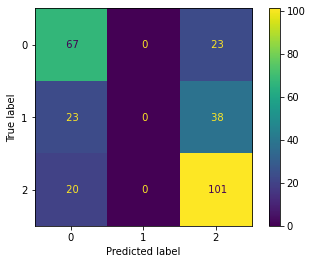

In [81]:
cm = confusion_matrix(y_val, dt1_pred, labels = dtcv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot(values_format = ' ')

In [43]:
dt_prob = lg1.predict_proba(x_val)

In [44]:
dt_df = pd.DataFrame(dt_prob, columns = ['HomeWinProbability', 'DrawProbability', 'AwayWinProbability'])

In [45]:
dt_df['HomeTeam'] = pd.Series(epl3c.loc[x_val.index, 'HomeTeam'].values)
dt_df['AwayTeam'] = pd.Series(epl3c.loc[x_val.index, 'AwayTeam'].values)

In [46]:
dt_df = dt_df[['HomeTeam', 'AwayTeam', 'HomeWinProbability', 'DrawProbability', 'AwayWinProbability']]
dt_df.head(10)

,HomeTeam,AwayTeam,HomeWinProbability,DrawProbability,AwayWinProbability
0,Bournemouth,Brighton,0.297030,0.306931,0.396040
1,Crystal Palace,Man City,0.297030,0.306931,0.396040
2,Fulham,Man City,0.204301,0.225806,0.569892
3,Crystal Palace,Watford,0.754717,0.094340,0.150943
4,Liverpool,Bournemouth,0.297030,0.306931,0.396040
5,Brighton,Newcastle,0.943396,0.056604,0.000000
6,Crystal Palace,Brentford,0.165563,0.344371,0.490066
7,Southampton,Tottenham,0.019608,0.078431,0.901961
8,Brighton,West Ham,0.620000,0.300000,0.080000
9,Nott'm Forest,Burnley,0.018182,0.018182,0.963636


In [47]:
print('best avg. score: ', '%.4f' %lg1.best_score_)
print('highest mean test f1: ', '%.4f' %lg1.cv_results_['mean_test_f1'].max())
print('highest mean test recall: ', '%.4f' %lg1.cv_results_['mean_test_recall'].max())
print('highest mean test precision: ', '%.4f' %lg1.cv_results_['mean_test_precision'].max())
print('highest mean test accuracy: ', '%.4f' %lg1.cv_results_['mean_test_accuracy'].max())

best avg. score:  0.5472
highest mean test f1:  0.5472
highest mean test recall:  0.5902
highest mean test precision:  0.5442
highest mean test accuracy:  0.5902


In [48]:
%%time
#ANALYZING USING RANDOM FOREST
rf = RandomForestClassifier(random_state = 42)

params = {'max_depth': [2,3,4,5,6,7,8,9,10, None],
          'min_samples_leaf': [2,3,5,7,10],
          'min_samples_split': [3,5,7,10,12,15,20],
          'max_features': [2,3,4,5,7,10],
          'n_estimators': [50,75,100,125,150]
         }

precision_scorer = make_scorer(precision_score, average='weighted', zero_division = 0)
recall_scorer = make_scorer(recall_score, average='weighted', zero_division = 0)
f1_scorer = make_scorer(f1_score, average='weighted', zero_division = 0)
accuracy_scorer = make_scorer(accuracy_score)

scoring = {
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'accuracy': accuracy_scorer
    }



rfcv = GridSearchCV(rf, params, cv = 5, scoring = scoring, refit = 'f1')

#rfcv.fit(x_train, y_train)

Wall time: 998 µs


In [49]:
path = r'C:\Users\Ayodele\Desktop\epl\ '
#pickle.dump(rfcv, open(path + 'rfcv_multi', 'wb'))

In [50]:
rfcv = pickle.load(open(path + 'rfcv_multi', 'rb'))

In [51]:
rfcv.best_params_

{'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 50}

In [52]:
rfcv.best_score_

0.5616418280577766

In [53]:
rfcv_pred = rfcv.predict(x_val)
print('accuracry score is: ', '%.4f' %accuracy_score(y_val, rfcv_pred))
print('precision score is: ', '%.4f' %precision_score(y_val, rfcv_pred, average = 'weighted'))
print('f1 score is: ', '%.4f' %f1_score(y_val, rfcv_pred, average = 'weighted'))
print('recall score is: ', '%.4f' %recall_score(y_val, rfcv_pred, average = 'weighted'))
rf_proba = rfcv.predict_proba(x_val)
print('auc score is:', '%.4f' %roc_auc_score(y_val, rf_proba, multi_class = 'ovr'))

accuracry score is:  0.8750
precision score is:  0.8851
f1 score is:  0.8722
recall score is:  0.8750
auc score is: 0.9801


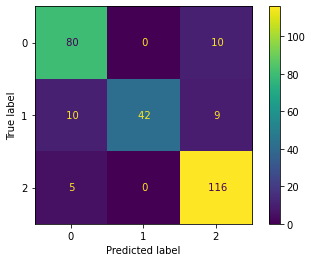

In [54]:
cm = confusion_matrix(y_val, rfcv_pred, labels = rfcv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfcv.classes_)
disp.plot(values_format = ' ')

In [55]:
print('best avg. score: ', '%.4f' %rfcv.best_score_)
print('highest mean test f1: ', '%.4f' %rfcv.cv_results_['mean_test_f1'].max())
print('highest mean test recall: ', '%.4f' %rfcv.cv_results_['mean_test_recall'].max())
print('highest mean test precision: ', '%.4f' %rfcv.cv_results_['mean_test_precision'].max())
print('highest mean test accuracy: ', '%.4f' %rfcv.cv_results_['mean_test_accuracy'].max())

best avg. score:  0.5616
highest mean test f1:  0.5616
highest mean test recall:  0.6107
highest mean test precision:  0.6153
highest mean test accuracy:  0.6107


In [56]:
rfcv.best_estimator_

RandomForestClassifier(max_features=10, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=50, random_state=42)

In [57]:
rfcv_prob = rfcv.predict_proba(x_val)

rfcv_df = pd.DataFrame(rfcv_prob, columns = ['HomeWinProbability', 'DrawProbability', 'AwayWinProbability'])

rfcv_df['HomeTeam'] = pd.Series(epl3c.loc[x_val.index, 'HomeTeam'].values)
rfcv_df['AwayTeam'] = pd.Series(epl3c.loc[x_val.index, 'AwayTeam'].values)

rfcv_df = rfcv_df[['HomeTeam', 'AwayTeam', 'HomeWinProbability', 'DrawProbability', 'AwayWinProbability']]
rfcv_df.head(10)

,HomeTeam,AwayTeam,HomeWinProbability,DrawProbability,AwayWinProbability
0,Bournemouth,Brighton,0.112175,0.195037,0.692788
1,Crystal Palace,Man City,0.404404,0.348594,0.247002
2,Fulham,Man City,0.224939,0.456536,0.318525
3,Crystal Palace,Watford,0.616199,0.243123,0.140677
4,Liverpool,Bournemouth,0.305502,0.385903,0.308596
5,Brighton,Newcastle,0.942165,0.036866,0.020970
6,Crystal Palace,Brentford,0.083399,0.195925,0.720676
7,Southampton,Tottenham,0.021699,0.067100,0.911201
8,Brighton,West Ham,0.728446,0.153356,0.118198
9,Nott'm Forest,Burnley,0.006675,0.044664,0.948661


In [58]:
%%time
#ANALYSING WITH XGBOOST
parameters = {'max_depth':[2,3,4,5,6,7,8,9,10,12,15, None],
             'min_child_weight':[1,2,3,4,5,6,10],
              'learning_rate':[0.1, 0.2, 0.3],
              'n_estimators': [50,60,70,80,90,100,120,140,160,180,200,250],
              'subsample':[0.5],
              'colsample_bytree':[0.7]
             }

precision_scorer = make_scorer(precision_score, average='weighted', zero_division = 0)
recall_scorer = make_scorer(recall_score, average='weighted', zero_division = 0)
f1_scorer = make_scorer(f1_score, average='weighted', zero_division = 0)
accuracy_scorer = make_scorer(accuracy_score)

scoring = {
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'accuracy': accuracy_scorer
}

xgb = XGBClassifier(objective = 'multi:softprob',random_state = 42)

xgb_cv = GridSearchCV(xgb, parameters, scoring = scoring, refit = 'f1', cv = 5)

#xgb_cv.fit(x_train, y_train)

Wall time: 1.99 ms


In [59]:
path = r'C:\Users\Ayodele\Desktop\epl\ '
#pickle.dump(xgb_cv, open(path + 'xgbcv_multi', 'wb'))

In [60]:
xgb_cv = pickle.load(open(path + 'xgbcv_multi', 'rb'))

In [61]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 2,
 'min_child_weight': 10,
 'n_estimators': 90,
 'subsample': 0.5}

In [62]:
xgb_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=90, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [63]:
print('best avg. score: ', '%.4f' %xgb_cv.best_score_)
print('highest mean test f1: ', '%.4f' %xgb_cv.cv_results_['mean_test_f1'].max())
print('highest mean test recall: ', '%.4f' %xgb_cv.cv_results_['mean_test_recall'].max())
print('highest mean test precision: ', '%.4f' %xgb_cv.cv_results_['mean_test_precision'].max())
print('highest mean test accuracy: ', '%.4f' %xgb_cv.cv_results_['mean_test_accuracy'].max())

best avg. score:  0.5704
highest mean test f1:  0.5704
highest mean test recall:  0.6056
highest mean test precision:  0.5656
highest mean test accuracy:  0.6056


In [64]:
print('highest mean test recall: ', '%.4f' %xgb_cv.cv_results_['mean_test_recall'].max())

highest mean test recall:  0.6056


In [65]:
xgb_pred = xgb_cv.predict(x_val)
print('accuracry score is: ', '%.4f' %accuracy_score(y_val, xgb_pred))
print('precision score is: ', '%.4f' %precision_score(y_val, xgb_pred, average = 'weighted'))
print('f1 score is: ', '%.4f' %f1_score(y_val, xgb_pred, average = 'weighted'))
print('recall score is: ', '%.4f' %recall_score(y_val, xgb_pred, average = 'weighted'))
xgb_proba = xgb_cv.predict_proba(x_val)
print('auc score is:', '%.4f' %roc_auc_score(y_val, xgb_proba, multi_class = 'ovr'))

accuracry score is:  0.6765
precision score is:  0.6565
f1 score is:  0.6509
recall score is:  0.6765
auc score is: 0.8125


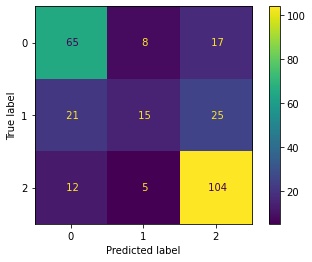

In [66]:
cm = confusion_matrix(y_val, xgb_pred, labels = xgb_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb_cv.classes_)
disp.plot(values_format = ' ')

In [67]:
xgb_prob = xgb_cv.predict_proba(x_val)

xgb_df = pd.DataFrame(xgb_prob, columns = ['HomeWinProbability', 'DrawProbability', 'AwayWinProbability'])

xgb_df['HomeTeam'] = pd.Series(epl3c.loc[x_val.index, 'HomeTeam'].values)
xgb_df['AwayTeam'] = pd.Series(epl3c.loc[x_val.index, 'AwayTeam'].values)

xgb_df = xgb_df[['HomeTeam', 'AwayTeam', 'HomeWinProbability', 'DrawProbability', 'AwayWinProbability']]
xgb_df.head(10)

,HomeTeam,AwayTeam,HomeWinProbability,DrawProbability,AwayWinProbability
0,Bournemouth,Brighton,0.238367,0.241081,0.520552
1,Crystal Palace,Man City,0.385203,0.376093,0.238704
2,Fulham,Man City,0.299260,0.425537,0.275203
3,Crystal Palace,Watford,0.580183,0.247610,0.172207
4,Liverpool,Bournemouth,0.368051,0.300790,0.331159
5,Brighton,Newcastle,0.871191,0.083006,0.045804
6,Crystal Palace,Brentford,0.116527,0.253600,0.629873
7,Southampton,Tottenham,0.033081,0.071544,0.895375
8,Brighton,West Ham,0.659792,0.237666,0.102542
9,Nott'm Forest,Burnley,0.021241,0.053914,0.924845


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

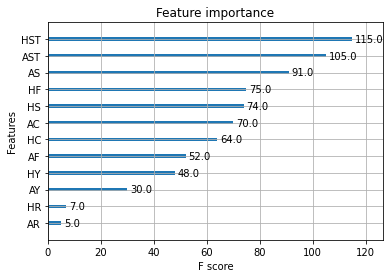

In [68]:
plot_importance(xgb_cv.best_estimator_)

In [69]:
accuracy_dt = accuracy_score(y_val, dt1_pred)
precision_dt = precision_score(y_val, dt1_pred, average = 'weighted', zero_division = 0)
f1_dt = f1_score(y_val, dt1_pred, average = 'weighted')
recall_dt = recall_score(y_val, dt1_pred, average = 'weighted')
auc_dt = roc_auc_score(y_val, dt_proba, multi_class = 'ovr')

accuracy_rf = accuracy_score(y_val, rfcv_pred)
precision_rf = precision_score(y_val, rfcv_pred, average = 'weighted', zero_division = 0)
f1_rf = f1_score(y_val, rfcv_pred, average = 'weighted')
recall_rf = recall_score(y_val, rfcv_pred, average = 'weighted')
auc_rf = roc_auc_score(y_val, rf_proba, multi_class = 'ovr')

accuracy_xgb = accuracy_score(y_val, xgb_pred)
precision_xgb = precision_score(y_val, xgb_pred, average = 'weighted', zero_division = 0)
f1_xgb = f1_score(y_val, xgb_pred, average = 'weighted')
recall_xgb = recall_score(y_val, xgb_pred, average = 'weighted')
auc_xgb = roc_auc_score(y_val, xgb_proba, multi_class = 'ovr')

table = {'decision_tree': {'accuracy': accuracy_dt, 'precision': precision_dt, 'f1': f1_dt, 'recall':recall_dt, 'auc':auc_dt},
           'random_forest': {'accuracy': accuracy_rf, 'precision': precision_rf, 'f1': f1_rf, 'recall':recall_rf, 'auc':auc_rf},
           'xgb': {'accuracy': accuracy_xgb, 'precision': precision_xgb, 'f1': f1_xgb, 'recall':recall_xgb, 'auc':auc_xgb}
          }

results = pd.DataFrame(table)
results.to_csv(r'C:\Users\Ayodele\Desktop\epl\results_multi.csv', index = True)

In [70]:
results = pd.read_csv(r'C:\Users\Ayodele\Desktop\epl\results_multi.csv')
results

,Unnamed: 0,decision_tree,random_forest,xgb
0,accuracy,0.617647,0.875000,0.676471
1,precision,0.478884,0.885146,0.656486
2,f1,0.539219,0.872212,0.650949
3,recall,0.617647,0.875000,0.676471
4,auc,0.738833,0.980056,0.812532


<Axes: xlabel='metric', ylabel='value'>

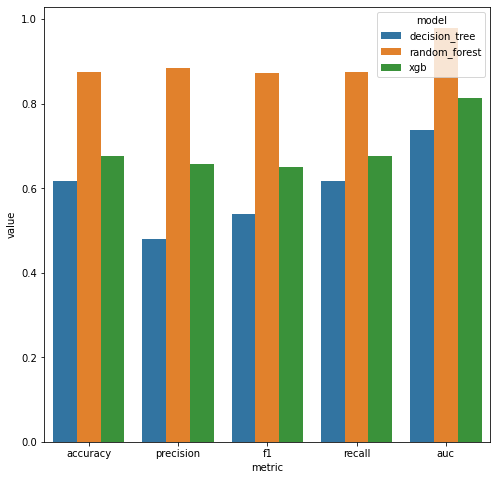

In [71]:
result = pd.DataFrame({'model': ['decision_tree', 'decision_tree', 'decision_tree', 'decision_tree', 'decision_tree',
                                'random_forest','random_forest','random_forest','random_forest', 'random_forest',
                                'xgb', 'xgb', 'xgb', 'xgb', 'xgb'],
                      'metric': ['accuracy', 'precision', 'f1', 'recall', 'auc',
                                'accuracy', 'precision', 'f1', 'recall', 'auc',
                                'accuracy', 'precision', 'f1', 'recall', 'auc'],
                      'value': [accuracy_dt, precision_dt, f1_dt, recall_dt, auc_dt,
                               accuracy_rf, precision_rf, f1_rf, recall_rf, auc_rf,
                               accuracy_xgb, precision_xgb, f1_xgb, recall_xgb, auc_xgb]
                      })


plt.figure(figsize = (8,8))
sns.barplot(data = result, x = 'metric', y = 'value', hue = 'model')

<Axes: >

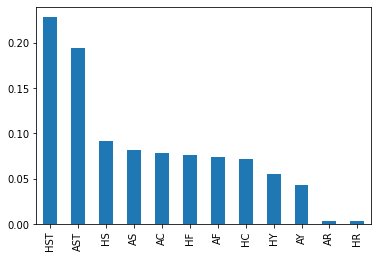

In [72]:
important = rfcv.best_estimator_.feature_importances_
rf_imp = pd.Series(important, index = x.columns).sort_values(ascending = False)
fig, ax = plt.subplots()
rf_imp.plot.bar(ax=ax)

<Axes: >

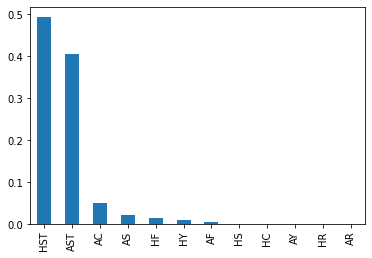

In [73]:
important = lg1.best_estimator_.feature_importances_
dt_imp = pd.Series(important, index = x.columns).sort_values(ascending = False)
fig, ax = plt.subplots()
dt_imp.plot.bar(ax=ax)

In [74]:
champion_pred = rfcv.predict(x_test)
print('accuracry score is: ', '%.4f' %accuracy_score(y_test, champion_pred))
print('precision score is: ', '%.4f' %precision_score(y_test, champion_pred, average = 'weighted'))
print('f1 score is: ', '%.4f' %f1_score(y_test, champion_pred, average = 'weighted'))
print('recall score is: ', '%.4f' %recall_score(y_test, champion_pred, average = 'weighted'))
rfcv_prob = rfcv.predict_proba(x_test)
print('auc score is:', '%.4f' %roc_auc_score(y_test, rfcv_prob, multi_class = 'ovr'))

accuracry score is:  0.5882
precision score is:  0.5540
f1 score is:  0.5574
recall score is:  0.5882
auc score is: 0.7267


In [75]:
rf_champ = rfcv.predict_proba(x_test)

rf_res = pd.DataFrame(rf_champ, columns = ['HomeWinProbability', 'DrawProbability', 'AwayWinProbability'])

rf_res['HomeTeam'] = pd.Series(epl3c.loc[x_val.index, 'HomeTeam'].values)
rf_res['AwayTeam'] = pd.Series(epl3c.loc[x_val.index, 'AwayTeam'].values)

rf_res = rf_res[['HomeTeam', 'AwayTeam', 'HomeWinProbability', 'DrawProbability', 'AwayWinProbability']]
rf_res.head(10)

,HomeTeam,AwayTeam,HomeWinProbability,DrawProbability,AwayWinProbability
0,Bournemouth,Brighton,0.311571,0.300402,0.388027
1,Crystal Palace,Man City,0.354146,0.312970,0.332884
2,Fulham,Man City,0.443524,0.422011,0.134465
3,Crystal Palace,Watford,0.219581,0.329394,0.451025
4,Liverpool,Bournemouth,0.193204,0.308564,0.498231
5,Brighton,Newcastle,0.286748,0.242623,0.470630
6,Crystal Palace,Brentford,0.132905,0.313767,0.553328
7,Southampton,Tottenham,0.191454,0.059097,0.749449
8,Brighton,West Ham,0.568703,0.176540,0.254757
9,Nott'm Forest,Burnley,0.618087,0.221679,0.160234


In [76]:
champion_pred = xgb_cv.predict(x_test)
print('accuracry score is: ', '%.4f' %accuracy_score(y_test, champion_pred))
print('precision score is: ', '%.4f' %precision_score(y_test, champion_pred, average = 'weighted'))
print('f1 score is: ', '%.4f' %f1_score(y_test, champion_pred, average = 'weighted'))
print('recall score is: ', '%.4f' %recall_score(y_test, champion_pred, average = 'weighted'))
xgb_prob = xgb_cv.predict_proba(x_test)
print('auc score is:', '%.4f' %roc_auc_score(y_test, xgb_prob, multi_class = 'ovr'))

accuracry score is:  0.6235
precision score is:  0.5849
f1 score is:  0.5919
recall score is:  0.6235
auc score is: 0.7404


In [77]:
xgb_champ = xgb_cv.predict_proba(x_test)

xgb_res = pd.DataFrame(xgb_champ, columns = ['HomeWinProbability', 'DrawProbability', 'AwayWinProbability'])

xgb_res['HomeTeam'] = pd.Series(epl3c.loc[x_val.index, 'HomeTeam'].values)
xgb_res['AwayTeam'] = pd.Series(epl3c.loc[x_val.index, 'AwayTeam'].values)

xgb_res = xgb_res[['HomeTeam', 'AwayTeam', 'HomeWinProbability', 'DrawProbability', 'AwayWinProbability']]
xgb_res.head(10)

,HomeTeam,AwayTeam,HomeWinProbability,DrawProbability,AwayWinProbability
0,Bournemouth,Brighton,0.430825,0.365647,0.203527
1,Crystal Palace,Man City,0.296609,0.412261,0.291130
2,Fulham,Man City,0.441847,0.463656,0.094497
3,Crystal Palace,Watford,0.161327,0.476341,0.362332
4,Liverpool,Bournemouth,0.218311,0.170221,0.611467
5,Brighton,Newcastle,0.282879,0.106027,0.611094
6,Crystal Palace,Brentford,0.278763,0.338342,0.382895
7,Southampton,Tottenham,0.128771,0.091202,0.780027
8,Brighton,West Ham,0.414855,0.209386,0.375758
9,Nott'm Forest,Burnley,0.593621,0.256514,0.149865


In [78]:
champion_pred = lg1.predict(x_test)
print('accuracry score is: ', '%.4f' %accuracy_score(y_test, champion_pred))
print('precision score is: ', '%.4f' %precision_score(y_test, champion_pred, average = 'weighted', zero_division = 0))
print('f1 score is: ', '%.4f' %f1_score(y_test, champion_pred, average = 'weighted'))
print('recall score is: ', '%.4f' %recall_score(y_test, champion_pred, average = 'weighted' ))
dt_prob = lg1.predict_proba(x_test)
print('auc score is:', '%.4f' %roc_auc_score(y_test, dt_prob, multi_class = 'ovr'))

accuracry score is:  0.5824
precision score is:  0.4493
f1 score is:  0.5069
recall score is:  0.5824
auc score is: 0.7036


In [79]:
dt_champ = lg1.predict_proba(x_test)

dt_res = pd.DataFrame(dt_champ, columns = ['HomeWinProbability', 'DrawProbability', 'AwayWinProbability'])

dt_res['HomeTeam'] = pd.Series(epl3c.loc[x_val.index, 'HomeTeam'].values)
dt_res['AwayTeam'] = pd.Series(epl3c.loc[x_val.index, 'AwayTeam'].values)
dt_res = dt_res[['HomeTeam', 'AwayTeam', 'HomeWinProbability', 'DrawProbability', 'AwayWinProbability']]
dt_res.head(10)

,HomeTeam,AwayTeam,HomeWinProbability,DrawProbability,AwayWinProbability
0,Bournemouth,Brighton,0.620000,0.300000,0.080000
1,Crystal Palace,Man City,0.297030,0.306931,0.396040
2,Fulham,Man City,0.620000,0.300000,0.080000
3,Crystal Palace,Watford,0.072289,0.337349,0.590361
4,Liverpool,Bournemouth,0.165563,0.344371,0.490066
5,Brighton,Newcastle,0.165563,0.344371,0.490066
6,Crystal Palace,Brentford,0.165563,0.344371,0.490066
7,Southampton,Tottenham,0.087719,0.175439,0.736842
8,Brighton,West Ham,0.396825,0.253968,0.349206
9,Nott'm Forest,Burnley,0.396825,0.253968,0.349206


In [80]:
dt_res[
    ((dt_res['HomeTeam'] == 'Chelsea') & (dt_res['AwayTeam'] == 'Wolves')) |
    ((dt_res['HomeTeam'] == 'Liverpool') & (dt_res['AwayTeam'] == 'Bournemouth')) |
    ((dt_res['HomeTeam'] == 'Chelsea') & (dt_res['AwayTeam'] == 'Brighton'))
]

,HomeTeam,AwayTeam,HomeWinProbability,DrawProbability,AwayWinProbability
4,Liverpool,Bournemouth,0.165563,0.344371,0.490066
37,Chelsea,Wolves,0.055556,0.277778,0.666667
118,Chelsea,Brighton,0.627451,0.176471,0.196078
191,Chelsea,Brighton,0.472727,0.236364,0.290909
